# Data Mining: Harry Potter Sorting Hat
Studente:

Harry Potter è una serie di romanzi fantasy scritta da J.K. Rowling che segue le avventure di un giovane mago, Harry, mentre frequenta la Scuola di Magia e Stregoneria di Hogwarts e affronta il potente mago oscuro Lord Voldemort.

In [197]:
from IPython.display import Image
Image(url="https://cdn.wallpapersafari.com/39/28/s9IzxG.jpg", width=800)


Come sceglie le casate il Cappello Parlante?
Il Cappello Parlante è un cappello magico che smista gli studenti nelle quattro casate di Hogwarts: Grifondoro, Serpeverde, Corvonero e Tassorosso. Durante la Cerimonia di Smistamento, il cappello viene posto sulla testa dello studente e legge nella sua mente desideri, qualità e potenziale. In base a ciò che trova, decide la casata più adatta. Si basa principalmete su alcune caratteristiche più rilevanti quali, ad esempio l'eredità genetica dei genitori, il coraggio, l'intelligenza, la lealtà, l'ambizione, la conoscenza delle arti oscure, abilità el giocare a quidditch, abilità nei duelli e creatività.

In [198]:
from IPython.display import Image
Image(url="https://th.bing.com/th/id/OIP.gfkCacIGJu_4w9Q08F8G9gHaFu?rs=1&pid=ImgDetMain", width=800)

Il dataset con il quale si è deciso di lavorare raccoglie le informazioni di streghe e maghi puramente frutto dell'immaginazione ispirati dal magico mondo di Harry Potter.
Il dataset contiene informazioni riguardo abilità e peculiarità degli studenti della scuola di magia e stregoneria di Hogwarts.

_Attributi_
Gli attributi di tale dataset sono alquanto esplici:
- Blood Status
- Coraggio
- Intelligenza
- Fedeltà
- Ambizione
- Conoscenza delle Arti Oscure
- Conoscenza del Quidditch
- Abilità nel duello
- Creatività
- Casata
- id
- Nome
- Cognome
- Età

L'obiettivo del seguente studio sarà, dunque, dopo aver studiato il dataset, quello di predire la casata di uno studente della scuola di magia e stregoneria di Hogwarts attraverso modelli di classificazione e clustering.

# Setup

In [199]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tavola colori personalizzata per ogni casata
hue_palette = {
    'Gryffindor': '#D62828',
    'Ravenclaw': '#003049',
    'Hufflepuff': '#F77F00',
    'Slytherin': '#2A9D8F'
}
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## Get Data

In [200]:
studenti = pd.read_csv("harry_potter_students.csv")

Diamo un'occhiata veloce ai nostri dati

In [201]:
studenti.head()

,Blood Status,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,House,id,name,surname,age
0,Pure-blood,NaN,NaN,NaN,NaN,7.0,NaN,8.0,NaN,NaN,9717,Elio,Blackwood,NaN
1,Muggle-born,3.0,7.0,6.0,2.0,5.0,3.0,3.0,10.0,Ravenclaw,17150,Mirek,Blackwood,18.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4607,Yara,Blackwood,18.0
3,Muggle-born,2.0,9.0,1.0,2.0,3.0,0.0,5.0,8.0,Ravenclaw,14010,Theo,Blackwood,13.0
4,NaN,NaN,NaN,9.0,2.0,NaN,1.0,NaN,NaN,NaN,19486,Bastian,Blackwood,17.0


In [202]:
studenti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Blood Status         15059 non-null  object 
 1   Bravery              15043 non-null  float64
 2   Intelligence         15019 non-null  float64
 3   Loyalty              15088 non-null  float64
 4   Ambition             15005 non-null  float64
 5   Dark Arts Knowledge  14964 non-null  float64
 6   Quidditch Skills     15089 non-null  float64
 7   Dueling Skills       15038 non-null  float64
 8   Creativity           14995 non-null  float64
 9   House                15049 non-null  object 
 10  id                   20000 non-null  int64  
 11  name                 19054 non-null  object 
 12  surname              19392 non-null  object 
 13  age                  17944 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 2.1+ MB


Alcune osservazioni:
1. Tutti gli attributi, eccetto gli id, contengono valori nulli
2. Gli attributi Blood Status, House, Name e surname sono di tipo object, tutti gli altri hanno valori numerici

Gli attributi non numerici contengono del testo


In [203]:
studenti["Blood Status"].value_counts()

Blood Status
Half-blood     5479
Pure-blood     4879
Muggle-born    4701
Name: count, dtype: int64

In [204]:
studenti["House"].value_counts()

House
Slytherin     3986
Ravenclaw     3981
Hufflepuff    3715
Gryffindor    3367
Name: count, dtype: int64

In [205]:
studenti["name"].value_counts()

name
Orion        428
Laziel       417
Soren        415
Jasper       409
Minerva      408
Cassia       401
Caius        401
Vera         401
Ines         400
Ronan        399
Oswin        395
Maia         394
Evander      393
Mirek        393
Fenris       390
Thalia       390
Galen        389
Nerissa      389
Nyx          389
Lucien       387
Sorrel       386
Rowan        385
Kai          384
Anya         384
Thorne       384
Liora        382
Alaric       380
Bran         377
Silas        376
Caelum       376
Bastian      376
Talia        374
Elio         373
Eira         372
Zara         372
Kieran       371
Calliope     370
Aurelia      369
Ione         368
Seraphina    366
Vesper       363
Freya        363
Leif         358
Lyra         357
Amara        356
Theo         353
Ezra         351
Yara         348
Dorian       346
Isolde       346
Name: count, dtype: int64

In [206]:
studenti["surname"].value_counts()

surname
Ashcroft       1016
Frostbane      1016
Rosenthal      1011
Graves         1009
Thorne         1002
Nightshade     1002
Moonvale       1001
Blackwood      1000
Ravenscar       998
Duskryn         987
Everbleed       631
Hawkwind        621
Shadowmere      535
Duskwatch       535
Emberlain       530
Darkwater       529
Emberwyld       528
Brightmoor      527
Stormrider      518
Flintveil       433
Falconshade     431
Rookwood        430
Wyrmspire       427
Starcrest       423
Whisperwind     419
Stoneveil       419
Coldmarsh       416
Ironhart        334
Stormholt       333
Thistledown     331
Name: count, dtype: int64

Andiamo a vedere con sono distribuiti i dati


In [207]:
studenti.describe()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,id,age
count,15043.000000,15019.000000,15088.000000,15005.000000,14964.000000,15089.000000,15038.000000,14995.000000,20000.000000,17944.000000
mean,12.703906,13.409842,12.983709,12.801927,10.137579,13.869166,15.734878,13.091507,9996.332450,14.460432
std,16.446797,17.086460,16.678454,16.558307,15.330163,17.569925,19.357735,16.924724,5770.504055,2.290158
min,0.113545,0.174546,0.162992,0.113689,0.000000,0.000000,0.113419,0.120405,1.000000,11.000000
25%,3.621311,4.000000,4.000000,3.807128,2.000000,4.254648,5.000000,4.000000,4999.750000,12.000000
50%,7.000000,7.000000,7.000000,7.000000,5.000000,7.000000,8.000000,7.000000,9996.500000,14.000000
75%,11.398395,12.441827,11.566732,11.316530,10.000000,13.593803,15.485791,11.690513,14993.250000,16.000000
max,99.993802,99.847951,99.722977,99.881474,99.838167,99.262810,99.927337,99.941068,19990.000000,18.000000


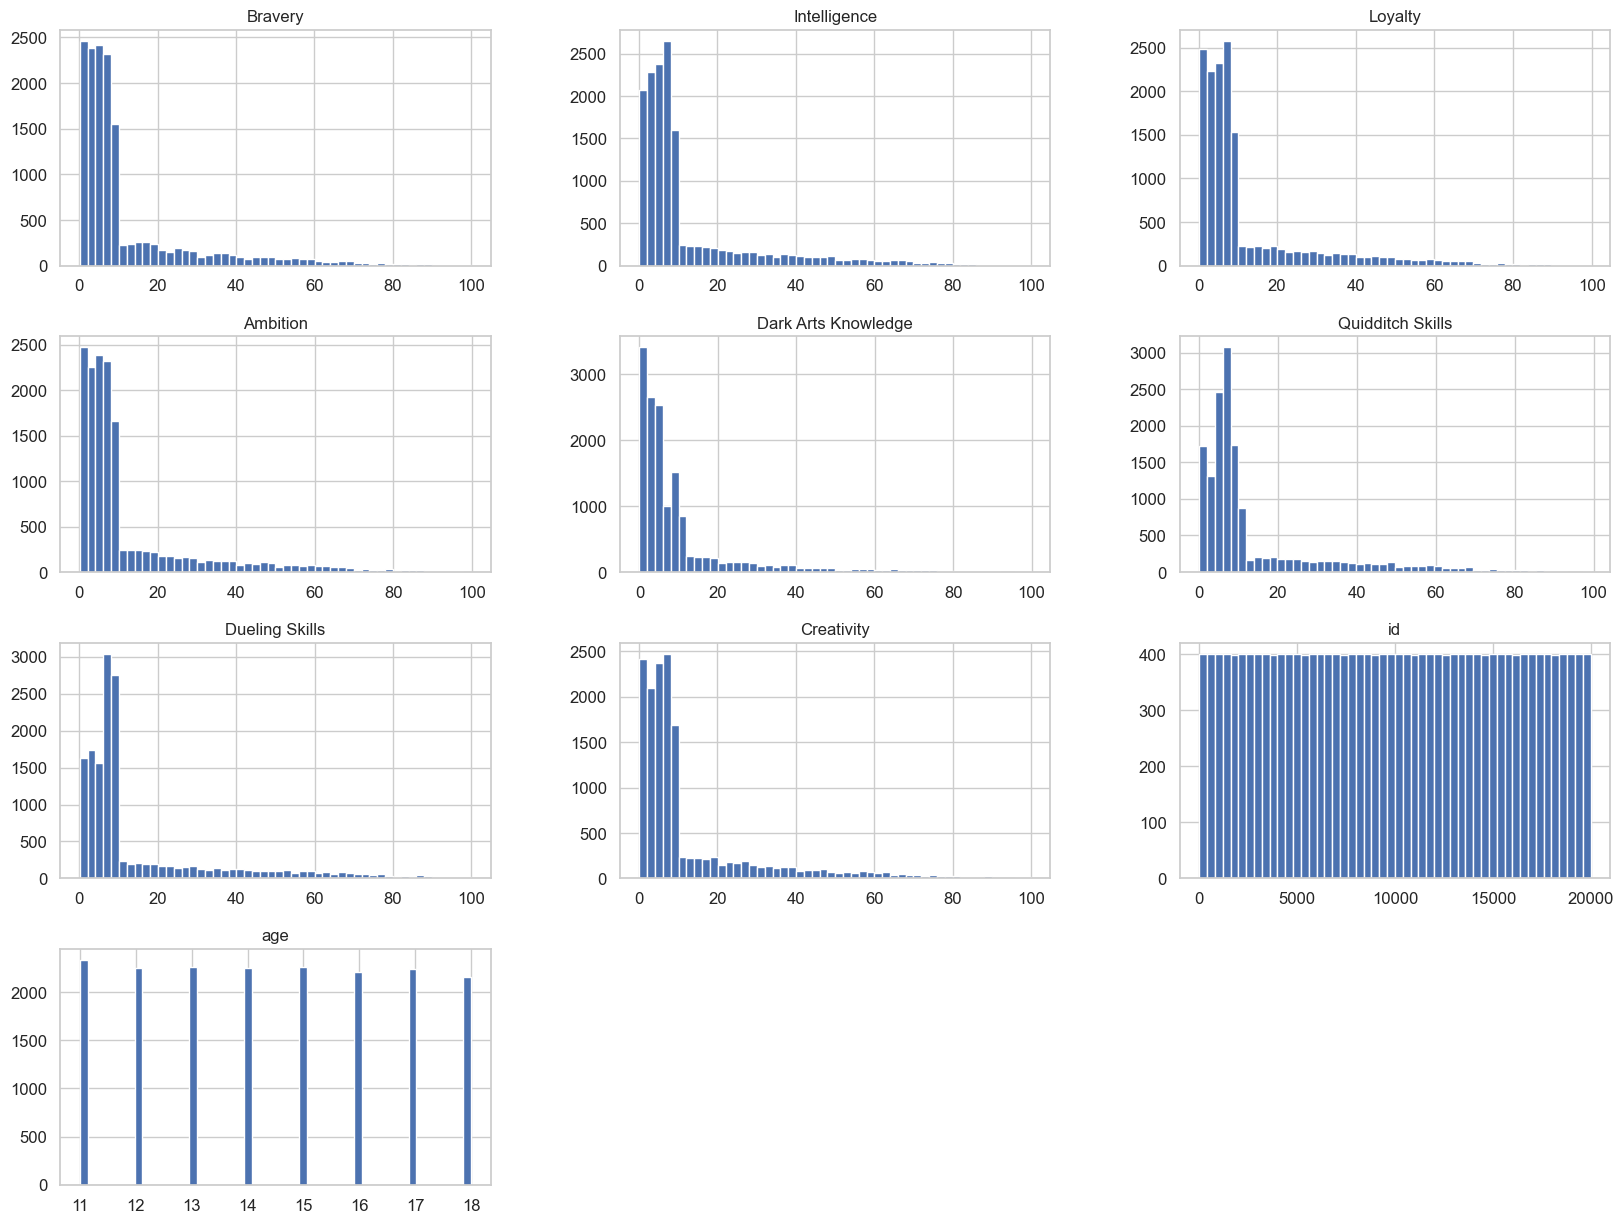

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt


studenti.hist(bins=50, figsize=(20,15))
plt.show()

Alcune considerazioni:
1. Distribuzioni Asimmetriche (Right-skewed)
    La maggior parte degli attributi come Bravery, Intelligence, Loyalty, Ambition, Dark Arts Knowledge, Quidditch Skills, Dueling Skills, e Creativity mostra una distribuzione asimmetrica verso destra (right-skewed). Questo significa che:
    - La maggior parte degli individui ha punteggi molto bassi.
    - Ci sono pochi individui con punteggi elevati (oltre 40 o 60).
    - Probabilmente questi punteggi sono assegnati in modo da rendere l’eccellenza rara
2. Distribuzione dell’età
    La variabile age è uniformemente distribuita tra 11 e 18 anni, con circa lo stesso numero di individui per ogni età. Questo fa pensare a un dataset bilanciato in termini di età scolastica. Ai fini della predizione della casata non sembra essere un attributo utile, quindi si decide di eliminare la colonna.
3. Variabile ID
    La variabile id è distribuita uniformemente. Questo è atteso, poiché rappresenta probabilmente identificatori univoci per ogni osservazione (studente/personaggio). Ai fini della predizione della casata non sembra essere un attributo utile, quindi si decide di eliminare la colonna.
4. Confronti tra abilità
    Dark Arts Knowledge e Dueling Skills sembrano avere code leggermente più lunghe, suggerendo che ci siano più persone con punteggi elevati in queste aree rispetto ad altre.
    Creativity e Intelligence mostrano anch’esse una coda estesa, ma con una maggiore concentrazione nei punteggi più bassi.

In [209]:
studenti = studenti.drop(['id', 'age'], axis=1)

# Creazione Test Set e Training Set


In [210]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(studenti, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16000, 12), (4000, 12))

Dividere i dati (splitting the data) è un compito delicato e cruciale perché da esso dipende l'affidabilità del modello predittivo. Ecco perché:
1. **Evita l'overfitting**: Se alleni il modello su tutti i dati disponibili, rischi che impari troppo bene i dettagli specifici del dataset (rumore incluso), perdendo la capacità di generalizzare su dati nuovi.
2. **Valutazione onesta**: Separare i dati in **training** e **test** permette di valutare le prestazioni del modello su dati mai visti prima, simulando come si comporterà nel mondo reale.
3. **Distribuzione coerente**: Se la divisione non è fatta correttamente (es. in modo casuale ma sbilanciato), si rischia che il modello sia allenato o testato su insiemi di dati non rappresentativi, portando a risultati fuorvianti.
4. **Evitare leakage**: Una divisione scorretta può causare data leakage, cioè quando informazioni dal test set "trapelano" nel training set, gonfiando artificialmente le prestazioni del modello.


Per capire se il test set è ben costruito, andiamo a vedere le la distribuzione di tale forma simile della distribuzione del train set

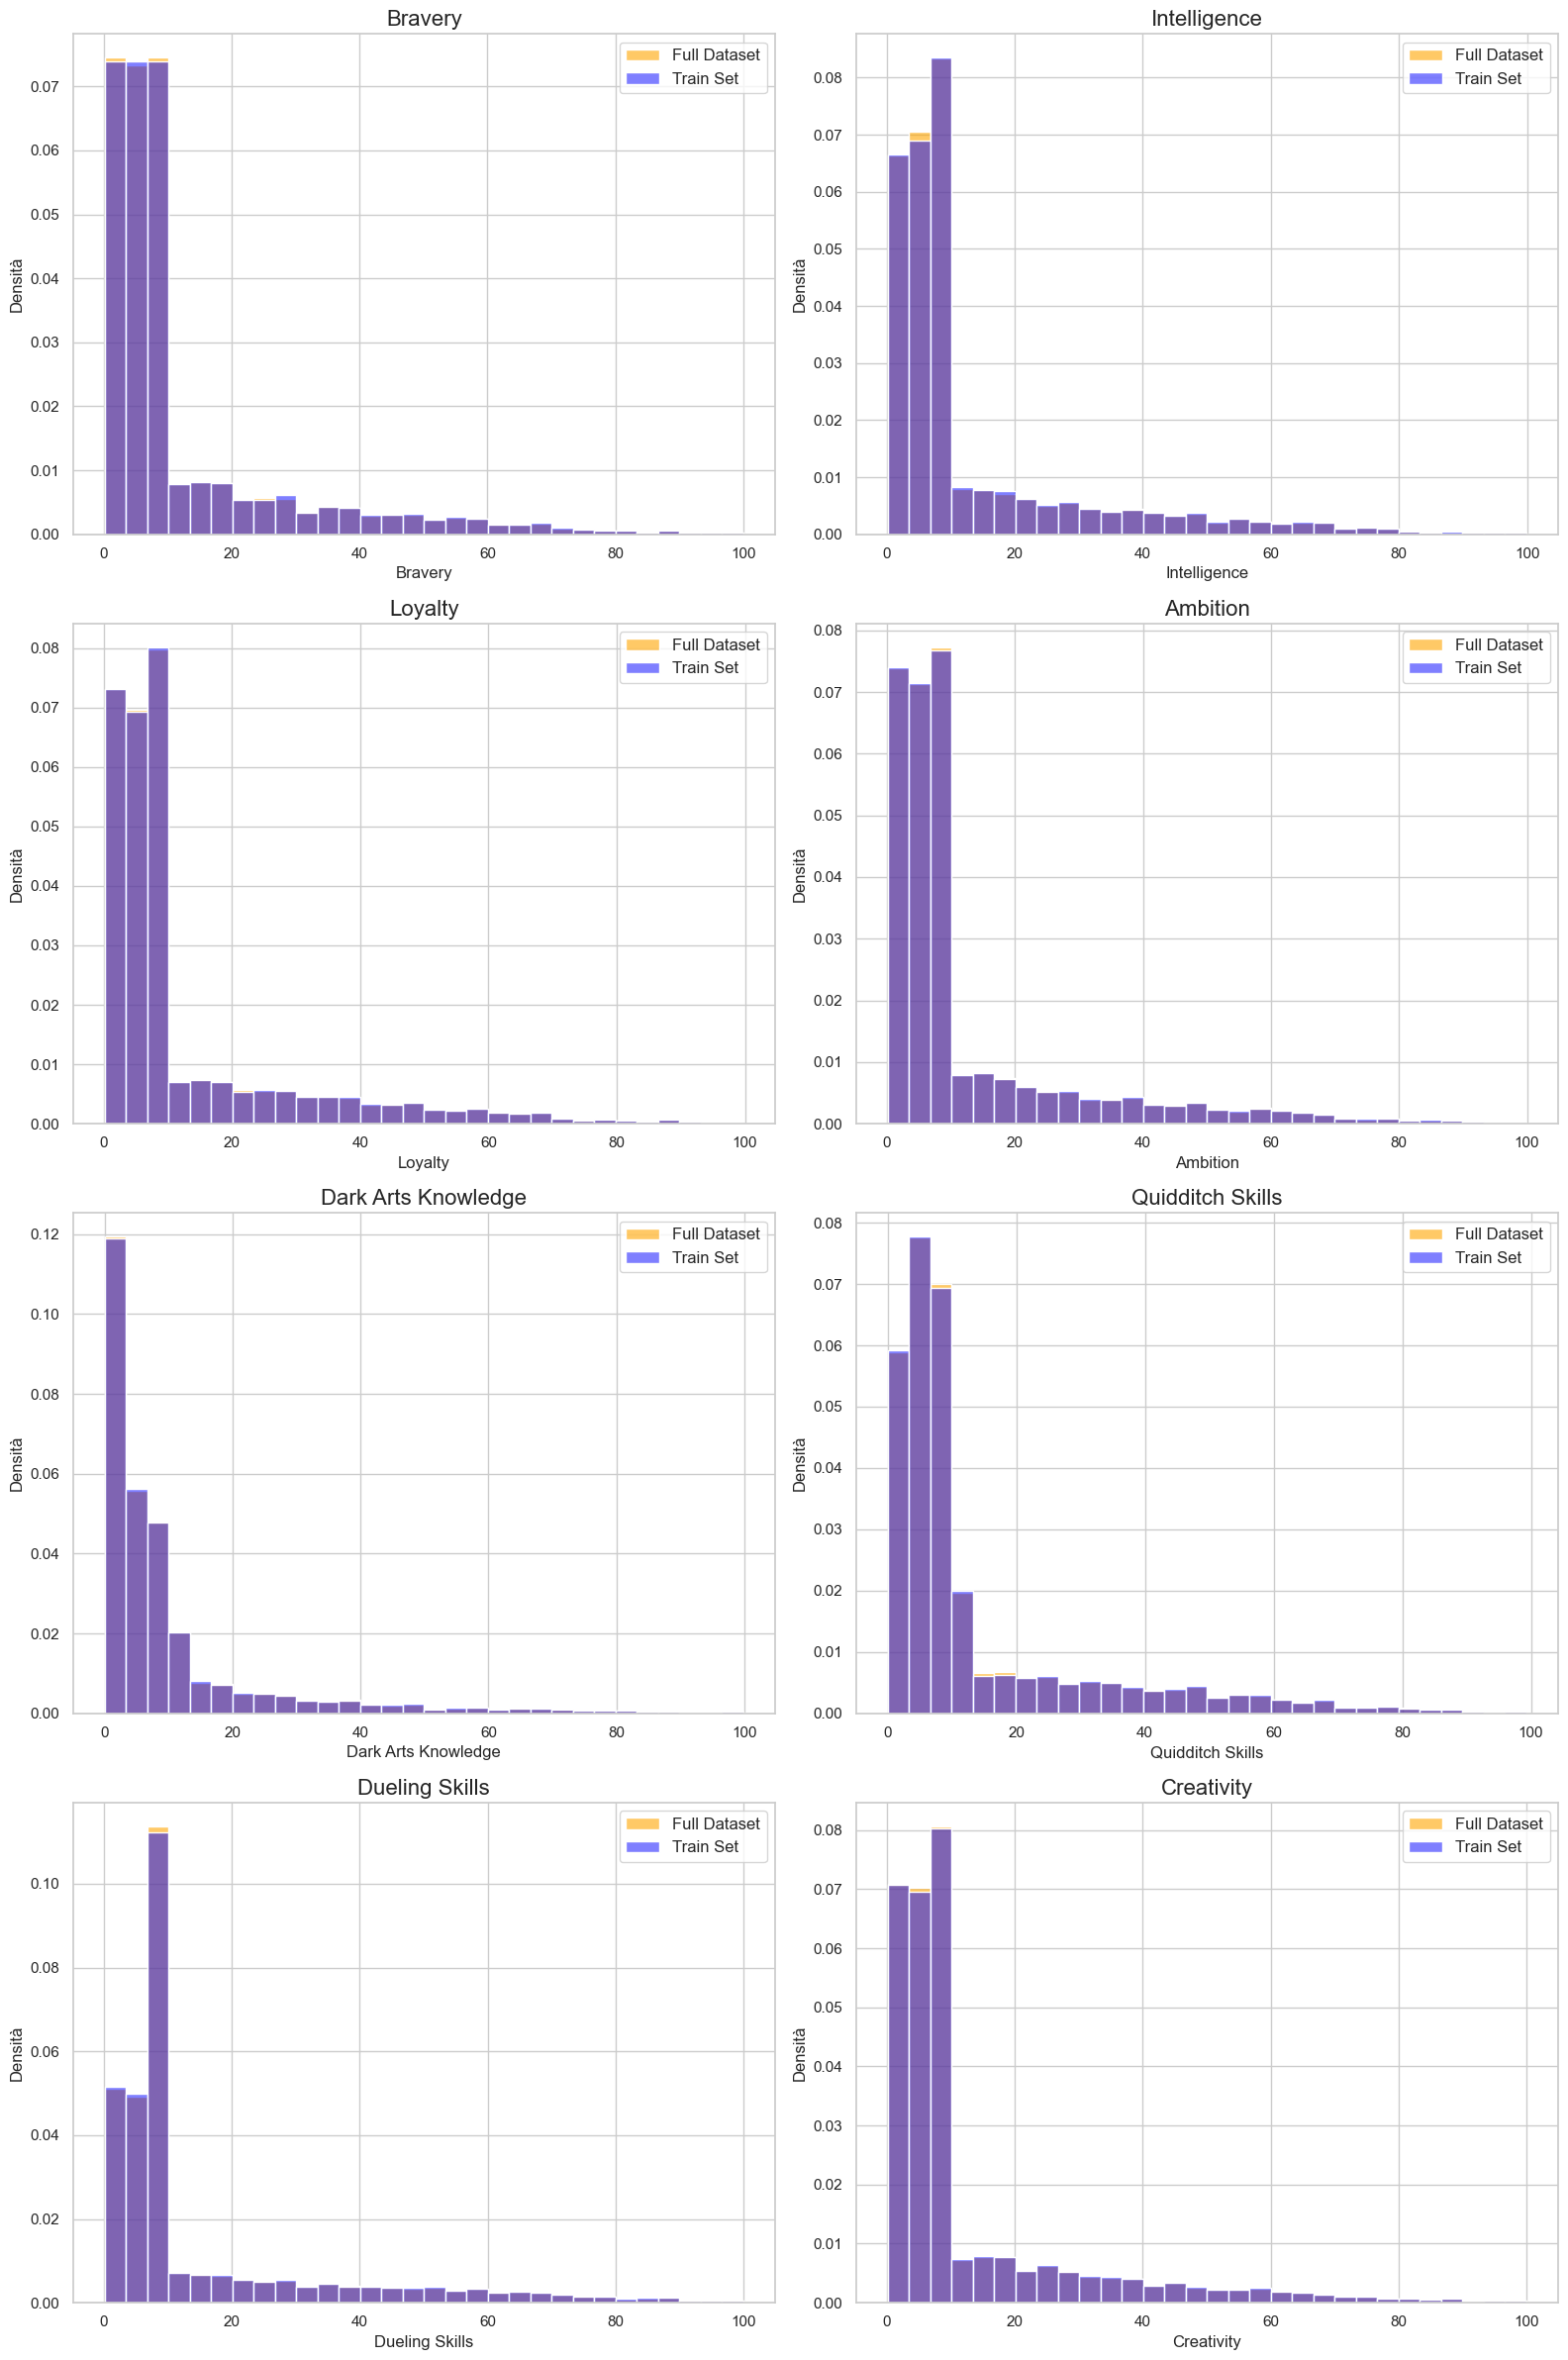

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attributi da confrontare
attributes = [
    'Bravery', 'Intelligence', 'Loyalty', 'Ambition', 'Dark Arts Knowledge',
    'Quidditch Skills', 'Dueling Skills', 'Creativity'
]

# Imposta stile e dimensione
sns.set(style="whitegrid")
n_cols = 2
n_rows = (len(attributes) + 1) // n_cols
plt.figure(figsize=(16, n_rows * 6))  # Aumenta la dimensione complessiva

for i, attr in enumerate(attributes):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(studenti[attr], color='orange', label='Full Dataset', kde=False, stat='density', alpha=0.6, bins=30)
    sns.histplot(train_set[attr], color='blue', label='Train Set', kde=False, stat='density', alpha=0.5, bins=30)
    plt.title(attr, fontsize=16)
    plt.xlabel(attr, fontsize=12)
    plt.ylabel('Densità', fontsize=12)
    plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


Le distribuzioni sembrano abbastanza equivalenti

# Scoperta e Visualizzazione dei dati
Fare plotting dei dati è sicuramente i modo migliore per visualizzare e capire pattern significativi sul dataset.
E' buona norma lavorare sempre per copia dei dati, e così faremo.

In [212]:
studenti = train_set.copy()


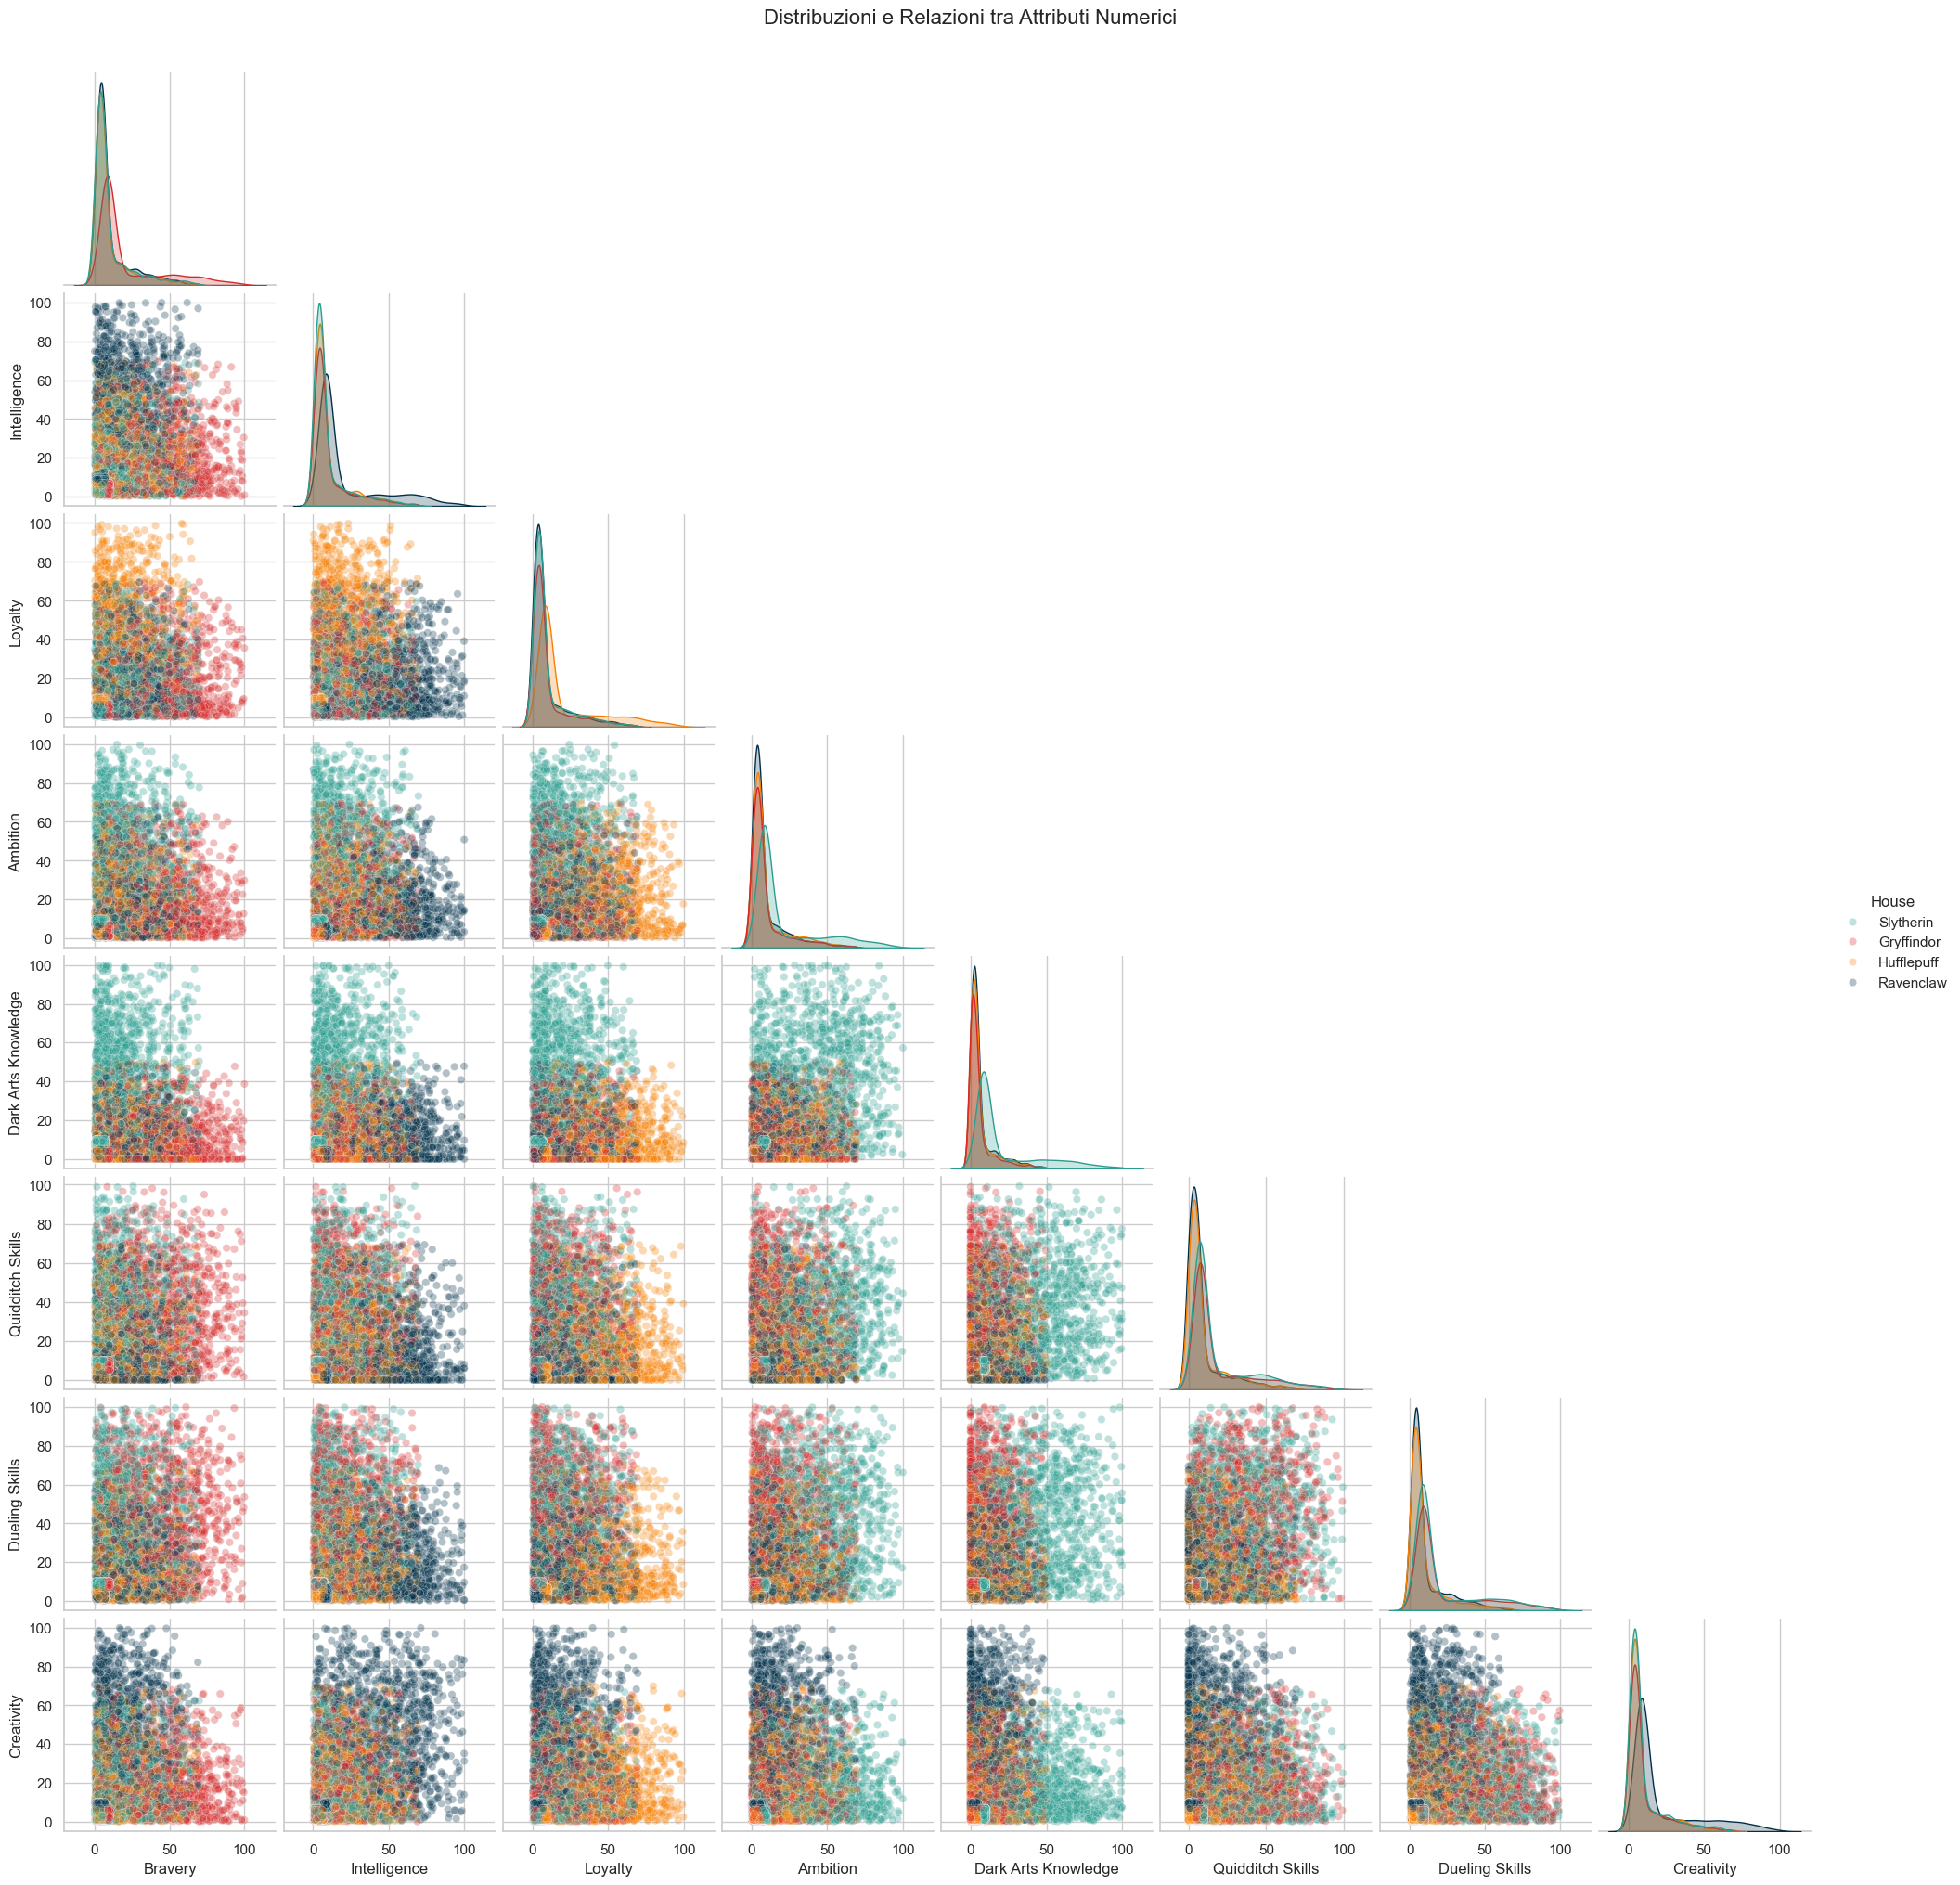

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selezione delle colonne numeriche
numerical_cols = [
    'Bravery', 'Intelligence', 'Loyalty', 'Ambition',
    'Dark Arts Knowledge', 'Quidditch Skills',
    'Dueling Skills', 'Creativity'
]

data = studenti[numerical_cols + ['House']]

# Pairplot
sns.pairplot(
    data,
    hue='House',
    palette=hue_palette,
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.3})
plt.suptitle("Distribuzioni e Relazioni tra Attributi Numerici", y=1.02, fontsize=16)
plt.show()



Dall’analisi del grafico, si notano alcune relazioni interessanti tra i vari tratti numerici dei personaggi, che ci aiutano a comprendere meglio come certi aspetti del loro carattere o delle loro abilità tendano a presentarsi insieme (o al contrario, a escludersi).

### Relazioni positive – caratteristiche che tendono a crescere insieme

Una delle relazioni più evidenti è quella tra **Ambizione** e **Conoscenza delle Arti Oscure**. In altre parole, i personaggi che mostrano una forte ambizione tendono anche ad avere un livello elevato di competenza nelle Arti Oscure. Questo suggerisce un legame tra il desiderio di potere o di successo e la volontà di acquisire conoscenze meno convenzionali, forse anche rischiose.
Allo stesso modo, c’è una certa affinità tra le **abilità nel Quidditch** e le **abilità nel duello**. È come se ci fosse un nucleo comune di talento fisico o riflessi rapidi che alimenta entrambe le competenze. Chi è bravo in uno di questi campi, spesso lo è anche nell’altro.

### Relazioni negative – caratteristiche che si escludono a vicenda
Tra le relazioni inverse, spicca quella tra **Lealtà** e **Ambizione**. Questo ci dice che, in questo insieme di dati, i personaggi più leali tendono ad essere meno ambiziosi, e viceversa. È una tensione interessante: da un lato la dedizione agli altri, dall’altro il desiderio di emergere. Non è difficile immaginare come queste due tendenze possano entrare in conflitto.
Anche tra **Coraggio (Bravery)** e **Conoscenza delle Arti Oscure** si intravede una relazione negativa. Chi è più coraggioso tende ad avere meno familiarità con le Arti Oscure, come se questi due tratti rappresentassero due vie diverse per affrontare le sfide: una più morale e diretta, l’altra più calcolata o misteriosa.
Infine, si nota una certa opposizione tra **Creatività** e **Lealtà**: chi è molto creativo sembra essere meno incline a seguire le regole o a rimanere fedele a un gruppo, forse perché tende a percorrere strade più personali e originali.

# Prepariamo i dati per gli algoritmi di Machine Learning

Separiamo le x, ovvero tutti gli attributi, dalle y, ovvero le etichette di classe.


In [214]:
studenti = train_set.drop("House", axis=1) # drop labels for training set
housing_labels = train_set["House"].copy()

# Data Cleaning
Abbiamo già notato che effettivamente abbiamo di valori mancanti che dobbiamo, in qualche modo, sistemare. Decidiamo di rimpiazzare i valori mancanti tramite imputer di sklearn

In [215]:
sample_incomplete_rows = studenti[studenti.isnull().any(axis=1)].head()
sample_incomplete_rows

,Blood Status,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,name,surname
5999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastian,Frostbane
6536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vesper,Thorne
4842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Soren,Duskryn
10581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Theo,Everbleed
10790,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,Laziel,Hawkwind


In [216]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Ma la mediana può essere calcolara solo per gli attributi numerici, dunque:

In [217]:
studenti_num = studenti.select_dtypes(include=['int64','float64'])
studenti_num.head()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
5894,6.473055,12.568707,2.280804,70.012871,44.897385,24.292561,14.928908,48.615828
3728,8.000000,7.000000,2.000000,6.000000,4.000000,6.000000,8.000000,4.000000
8958,10.000000,4.000000,3.000000,5.000000,2.000000,5.000000,10.000000,3.000000
7671,2.000000,5.000000,7.000000,5.000000,0.000000,0.000000,2.000000,2.000000
5999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
imputer.fit(studenti_num)

SimpleImputer(strategy='median')

In [219]:
studenti_num.median().values

array([7., 7., 7., 7., 5., 7., 8., 7.])

In [220]:
x = imputer.transform(studenti_num)
# Riconverti in DataFrame, con gli stessi nomi di colonna
import pandas as pd
studenti_num_tr = pd.DataFrame(x, columns=studenti_num.columns, index=studenti.index)

# Ora puoi aggiornare i dati originali (se vuoi)
studenti.update(studenti_num_tr)

Andiamo ora a gestire ora gli attributi caegorali

In [221]:
studenti_cat = studenti.select_dtypes(include=['object'])
studenti_cat.head(10)

,Blood Status,name,surname
5894,Half-blood,Nerissa,Frostbane
3728,Pure-blood,Yara,Moonvale
8958,Muggle-born,Leif,Ravenscar
7671,Pure-blood,Cassia,Nightshade
5999,NaN,Bastian,Frostbane
5751,Muggle-born,Caelum,Frostbane
1688,Pure-blood,Evander,Ashcroft
6836,Muggle-born,Fenris,Thorne
6536,NaN,Vesper,Thorne
4842,NaN,Soren,Duskryn


Procediamo di One Hot Encoding perchè:
1. Neutralizza l’ordine implicito
Le variabili categoriche (es. "Casa": ["Grifondoro", "Serpeverde", "Tassorosso", "Corvonero"]) non hanno un ordine numerico intrinseco. Se converti queste categorie in numeri semplicemente (es. Grifondoro = 0, Serpeverde = 1, ...), i modelli possono interpretare erroneamente un ordine o una distanza tra i valori. La One-Hot Encoding trasforma ogni categoria in una colonna binaria separata:
2. Compatibilità con algoritmi di machine learning
Molti modelli (come regressione lineare, alberi decisionali, reti neurali) non possono lavorare direttamente con stringhe o categorie non numeriche. La one-hot encoding fornisce una rappresentazione pura e matematica delle classi.
3. Evita assunzioni sbagliate
Attribuire numeri interi a categorie può far pensare al modello che ci siano relazioni di grandezza o proporzione tra le classi (es. che 2 sia il doppio di 1), il che non ha senso per le classi nominali.


In [222]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder(sparse_output=False)
studenti_cat_1hot = cat_encoder.fit_transform(studenti_cat)
studenti_cat_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(16000, 86))

In [223]:
print(cat_encoder.categories_)

[array(['Half-blood', 'Muggle-born', 'Pure-blood', nan], dtype=object), array(['Alaric', 'Amara', 'Anya', 'Aurelia', 'Bastian', 'Bran', 'Caelum',
       'Caius', 'Calliope', 'Cassia', 'Dorian', 'Eira', 'Elio', 'Evander',
       'Ezra', 'Fenris', 'Freya', 'Galen', 'Ines', 'Ione', 'Isolde',
       'Jasper', 'Kai', 'Kieran', 'Laziel', 'Leif', 'Liora', 'Lucien',
       'Lyra', 'Maia', 'Minerva', 'Mirek', 'Nerissa', 'Nyx', 'Orion',
       'Oswin', 'Ronan', 'Rowan', 'Seraphina', 'Silas', 'Soren', 'Sorrel',
       'Talia', 'Thalia', 'Theo', 'Thorne', 'Vera', 'Vesper', 'Yara',
       'Zara', nan], dtype=object), array(['Ashcroft', 'Blackwood', 'Brightmoor', 'Coldmarsh', 'Darkwater',
       'Duskryn', 'Duskwatch', 'Emberlain', 'Emberwyld', 'Everbleed',
       'Falconshade', 'Flintveil', 'Frostbane', 'Graves', 'Hawkwind',
       'Ironhart', 'Moonvale', 'Nightshade', 'Ravenscar', 'Rookwood',
       'Rosenthal', 'Shadowmere', 'Starcrest', 'Stoneveil', 'Stormholt',
       'Stormrider', 'Thistledown

In [224]:
studenti.columns

Index(['Blood Status', 'Bravery', 'Intelligence', 'Loyalty', 'Ambition',
       'Dark Arts Knowledge', 'Quidditch Skills', 'Dueling Skills',
       'Creativity', 'name', 'surname'],
      dtype='object')

# Feature Scaling

La scelta del **Robust Scaling** per normalizzare i dati del dataset si basa su una considerazione fondamentale: la presenza significativa di outlier nelle variabili numeriche.

Il `RobustScaler` di scikit-learn normalizza i dati centrandoli sulla mediana e scalandoli tramite l’intervallo interquartile (IQR), ovvero la differenza tra il 75° e il 25° percentile. Questo significa che:
La mediana diventa lo "zero" della scala. I valori vengono "compressi" rispetto alla dispersione centrale dei dati, ignorando gli estremi.

In [225]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(studenti[attributes])
studenti.describe()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,11.317671,11.855741,11.526550,11.358749,8.868847,12.185249,13.823649,11.611605
std,14.503714,15.069076,14.741696,14.578337,13.517415,15.544490,17.130240,14.904157
min,0.113545,0.174546,0.162992,0.113689,0.000000,0.000000,0.122784,0.120405
25%,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,6.361663,5.000000
50%,7.000000,7.000000,7.000000,7.000000,5.000000,7.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,10.000000,9.000000
max,99.993802,99.847951,99.722977,99.881474,99.838167,99.262810,99.927337,99.941068


# Transformation Pipelines
L'uso di una Transformation Pipeline è oggi una best practice fondamentale nel preprocessing e nell'addestramento dei modelli. Ti consente di:
- mantenere coerenza tra fasi di training e testing
- automatizzare i passaggi in maniera ordinata
- proteggere il modello da errori comuni, come il data leakage
- facilitare l’integrazione futura del tuo lavoro in ambienti di produzione o in applicazioni reali

In [226]:
# Selezione delle colonne numeriche
studenti_num = studenti.select_dtypes(include=['int64', 'float64'])

# Importazione dello scaler robusto
from sklearn.preprocessing import RobustScaler

# Creazione e applicazione dello scaler
scaler = RobustScaler()
studenti_num_scaled = scaler.fit_transform(studenti_num)


gestiamo ora quelli ch erano gli attributi categorici: abbiamo ancora dei valori null, dunque riscriviamo un algoritmo Imputer che fa affidamento al parametro "most_frequent", scaliamo i dati e prepariamo il nostro test set

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Seleziono le colonne
num_attribs = studenti.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs = studenti.select_dtypes(include=['object']).columns.tolist()

# 2. Pipeline solo per le colonne categoriche perchè quelle numeriche sono già state gestite
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False))
])

# 3. ColumnTransformer che lascia intatti i numerici
full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs)
], remainder='passthrough')  # 'passthrough' lascia invariate le altre colonne

# 4. Applica il pipeline
studenti_prepared = full_pipeline.fit_transform(studenti)

# 5. Ricostruzione dei nomi delle colonne
cat_feature_names = full_pipeline.named_transformers_["cat"]\
    .named_steps["encoder"].get_feature_names_out(cat_attribs)

# Il resto delle colonne (numeriche)
num_feature_names = num_attribs

# Riordina: `ColumnTransformer` mette prima i risultati del transformer, poi i 'passthrough'
all_feature_names = list(cat_feature_names) + num_feature_names

# 6. Conversione in DataFrame finale
studenti_prepared_df = pd.DataFrame(studenti_prepared, columns=all_feature_names, index=studenti.index)

# Visualizza struttura
studenti_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 5894 to 15795
Data columns (total 91 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Blood Status_Half-blood   16000 non-null  float64
 1   Blood Status_Muggle-born  16000 non-null  float64
 2   Blood Status_Pure-blood   16000 non-null  float64
 3   name_Alaric               16000 non-null  float64
 4   name_Amara                16000 non-null  float64
 5   name_Anya                 16000 non-null  float64
 6   name_Aurelia              16000 non-null  float64
 7   name_Bastian              16000 non-null  float64
 8   name_Bran                 16000 non-null  float64
 9   name_Caelum               16000 non-null  float64
 10  name_Caius                16000 non-null  float64
 11  name_Calliope             16000 non-null  float64
 12  name_Cassia               16000 non-null  float64
 13  name_Dorian               16000 non-null  float64
 14  name_Eir

ora che il nostro train set è finalmente pronto, possiamo andare ad allenare il modelli

# Selezione e Allenamento dei modelli